In [ ]:
import numpy as np
import IPython.display as ipd
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import pickle
#from sklearn import svm
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MaxAbsScaler
#from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, ZeroPadding2D #, Activation, Conv1D, MaxPool1D
from tensorflow.keras.optimizers import SGD #, Adam
#from tensorflow.keras.applications import ResNet50

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
"""
mfcc_dir = '/content/drive/MyDrive/colab/COVID19_Cough_Classifier/audio_mfcc_set.pkl'

audio_mfcc_set = []

with open(mfcc_dir, 'rb') as fp:
    audio_mfcc_set = pickle.load(fp)

print(len(audio_mfcc_set))
print(len(audio_mfcc_set[0]))
print(len(audio_mfcc_set[0][0]))
print(len(audio_mfcc_set[0][0][1]))
"""

10554
2
30
41


In [ ]:
"""
status_dir = '/content/drive/MyDrive/colab/COVID19_Cough_Classifier/status_list_set.pkl'

status_list_set = []

with open(status_dir, 'rb') as fp:
    status_list_set = pickle.load(fp)

print(len(status_list_set))
print(type(status_list_set))
print(type(status_list_set[0]))
"""

10554
<class 'list'>
<class 'str'>


In [ ]:
#2차원 mfcc 데이터가 저장된 리스트를 1차원 리스트로 변환
#status 레이블로 1차원 mfcc 리스트에 맞게끔 데이터 append 해줘야 됨
"""
print(len(audio_mfcc_set))
print(len(audio_mfcc_set[0]))
print(len(audio_mfcc_set[0][0]))
print(len(audio_mfcc_set[0][0][1]))
#print(audio_mfcc_set[0])
#print(audio_mfcc_set[0][0])

audio_mfcc_dims = []
status_dims = np.array([])

for i in range(0, len(audio_mfcc_set)):
  if status_list_set[i] != 'symptomatic':
    for k in range(0, len(audio_mfcc_set[i])):
        audio_mfcc_dims.append(audio_mfcc_set[i][k])
        #audio_mfcc_temp = np.append(audio_mfcc_dims, audio_mfcc_set[i][k].reshape(-1))
        status_dims = np.append(status_dims, status_list_set[i])
    print('state : {0}/{1}'.format(i, len(audio_mfcc_set)))

print('audio 1 dimension : ' + str(len(audio_mfcc_dims)))
print('status 1 dimension : ' + str(len(status_dims)))

for i in range(0, len(status_dims)):
    if status_dims[i] == 'healthy':
        status_dims[i] = 0
    #if status_dims[i] == 'symptomatic':
    #    status_dims[i] = 1
    if status_dims[i] == 'COVID-19':
        status_dims[i] = 1
"""

In [ ]:
#np.unique(status_dims, return_counts = True)

(array(['0', '1', '2'], dtype='<U32'), array([20940,  4597,  1592]))

In [ ]:
"""
pad2d = lambda a, i: a[0:i, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))
padded_mfcc = []
    
for i in range(0, len(audio_mfcc_dims)):
    padded_mfcc.append(pad2d(audio_mfcc_dims[i], 30))
    
    if (i % 100) == 0:
        print('state : {0}/{1}'.format(i, len(audio_mfcc_dims)))
        
print('success')
"""

In [ ]:
#with open('/content/drive/MyDrive/colab/COVID19_Cough_Classifier/preprocessed_data.pkl', 'wb') as fp:
#    pickle.dump(padded_mfcc, fp)

In [ ]:
#with open('/content/drive/MyDrive/colab/COVID19_Cough_Classifier/preprocessed_label.pkl', 'wb') as fp:
#    pickle.dump(status_dims, fp)

In [ ]:
mfcc_dir = '/content/drive/MyDrive/colab/COVID19_Cough_Classifier/preprocessed_data.pkl'

padded_mfcc = []

with open(mfcc_dir, 'rb') as fp:
    padded_mfcc = pickle.load(fp)

print(len(padded_mfcc))

22532


In [ ]:
status_dir = '/content/drive/MyDrive/colab/COVID19_Cough_Classifier/preprocessed_label.pkl'

status_dims = []

with open(status_dir, 'rb') as fp:
    status_dims = pickle.load(fp)

print(len(status_dims))

22532


In [ ]:
### CNN ###

audio_mfcc_np = np.array(padded_mfcc, dtype='float32')
status_dims = np.array(status_dims, dtype='int16')

print(audio_mfcc_np.shape, status_dims.shape)

(22532, 128, 128) (22532,)


In [ ]:
### CNN ###

train_x, test_x, train_y, test_y = train_test_split(audio_mfcc_np, status_dims, test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

print(train_x[1000].shape)

(18025, 128, 128)
(4507, 128, 128)
(18025,)
(4507,)
(128, 128)


In [ ]:
### CNN ###
"""
scaler = MinMaxScaler()

#for i in range(0, len(audio_mfcc_np)):
train_x = scaler.fit_transform(train_x.reshape(-1, train_x.shape[-1])).reshape(train_x.shape)
test_x = scaler.transform(test_x.reshape(-1, test_x.shape[-1])).reshape(test_x.shape)

print(train_x.shape)
print(test_x.shape)
"""

(18025, 128, 128)
(4507, 128, 128)


In [ ]:
### CNN ###

train_x = np.expand_dims(train_x, -1)
test_x = np.expand_dims(test_x, -1)

train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

print(train_x.shape, test_x.shape)
print(train_y.shape, test_y.shape)

(18025, 128, 128, 1) (4507, 128, 128, 1)
(18025, 2) (4507, 2)


In [ ]:
print(len(test_x))
print(len(test_x[4506]))
print(len(test_x[4506][127]))
print(len(test_x[4506][127][127]))

print(test_x[4506][127][127][0])
print(test_x[4506][127][127])
print(test_x[4505][127][127][0])
print(test_x[4505][127][127])
print(test_x[4504][127][127][0])
print(test_x[4504][127][127])


print(test_x[0][0][0][0])
print(test_x[0][0][0])

print(test_x[0][0][1][0])
print(test_x[0][0][1])

print(test_x[0][0][127][0])
print(test_x[0][0][127])

print(test_x[0][1][127][0])
print(test_x[0][1][127])

4507
128
128
1
-2.5424118
[-2.5424118]
2.3710556
[2.3710556]
-0.4664917
[-0.4664917]
-109.79832
[-109.79832]
-109.807014
[-109.807014]
-257.78775
[-257.78775]
161.45326
[161.45326]


In [ ]:
print(test_x[0][0])

In [ ]:
print(test_x[0])

In [ ]:
#from sklearn.metrics import accuracy_score
#from sklearn.tree import DecisionTreeClassifier

In [ ]:
### SVM ###
### Decision Tree ###
"""
audio_mfcc_np = np.array(padded_mfcc, dtype='float32')
audio_mfcc_array = audio_mfcc_np.reshape((22532, 128 * 128))
status_cat = np.array(status_dims, dtype='int16')

scaler = MinMaxScaler()

for i in range(0, len(audio_mfcc_np)):
  scaler.fit(audio_mfcc_np[i])
  
print(audio_mfcc_array.shape, status_cat.shape)
"""

(27129, 900) (27129,)


In [ ]:
### SVM ###
"""
train_x_split = train_x[:1000]
train_y_split = train_y[:1000]
test_x_split = test_x[:100]
test_y_split = test_y[:100]


SVM=svm.SVC(kernel='linear')
SVM.fit(train_x_split, train_y_split)

pred = SVM.predict(test_x_split)
acc = accuracy_score(pred, test_y_split)

print(acc)
"""

0.68


In [ ]:
### Decision Tree ###
"""
train_x_split = train_x[:1000]
train_y_split = train_y[:1000]
test_x_split = test_x[:100]
test_y_split = test_y[:100]

DTree = DecisionTreeClassifier()
DTree.fit(train_x_split, train_y_split)
pred = DTree.predict(test_x_split)
acc = accuracy_score(pred, test_y_split)

print(acc)
"""

0.65


In [ ]:
def build_model():
    model = Sequential()

    
    input = Input(shape=(128, 128, 1))

    output = Conv2D(filters=16, kernel_size=(3, 3), strides=1, activation='relu')(input) #32
    output = BatchNormalization()(output)
    output = MaxPool2D(pool_size=(2, 2), strides=2)(output)

    output = Conv2D(filters=32, kernel_size=(3, 3), strides=1, activation='relu')(output) #64
    output = BatchNormalization()(output)
    output = Dropout(0.3)(output)
    output = ZeroPadding2D(padding=(1, 1))(output) # x
    output = MaxPool2D(pool_size=(3, 3), strides=3)(output) # (2, 2) strides=2

    output = Conv2D(filters=64, kernel_size=(3, 3), strides=1, activation='relu')(output) #64
    output = BatchNormalization()(output)

    output = Flatten()(output)

    output = Dense(64, activation='relu')(output) #64
    output = Dropout(0.5)(output) # 첫번째 Dense 64로 했을 때 Drpout 사용
    output = Dense(32, activation='relu')(output) #32
    output = Dropout(0.3)(output)
    output = Dense(2, activation='softmax')(output)
    
    model = Model(inputs=input, outputs=output)
    
    """
    input = Input(shape=(30, 30, 1))

    output = Conv2D(filters=32, kernel_size=(3, 3), strides=1)(input)
    output = Activation('relu')(output)
    output = BatchNormalization()(output)
    output = Dropout(0.3)(output)

    output = MaxPool2D(pool_size=(2, 2), strides=1)(output)

    output = ZeroPadding2D(padding=(1, 1))(output)
    output = Conv2D(filters=64, kernel_size=(3, 3), strides=1)(output)
    output = Activation('relu')(output)
    output = BatchNormalization()(output)

    output = MaxPool2D(pool_size=(2, 2), strides=1)(output)

    output = Conv2D(filters=128, kernel_size=(3, 3), strides=1)(output)
    output = Activation('relu')(output)
    output = BatchNormalization()(output)
    output = Dropout(0.3)(output)

    output = Flatten()(output)
    
    output = Dense(1024, activation='relu')(output)
    output = Dense(1024, activation='relu')(output)
    output = Dense(2, activation='softmax')(output)
    
    model = Model(inputs=input, outputs=output)
    """
    """ AlexNet
    input = Input(shape=(128, 128, 1))

    output = ZeroPadding2D(padding=(3, 3))(input)
    output = Conv2D(filters=24, kernel_size=(7, 7), strides=3)(output) #96
    output = Activation('relu')(output)
    output = MaxPool2D(pool_size=(2, 2), strides=1)(output)
    output = BatchNormalization()(output)
    
    output = ZeroPadding2D(padding=(2, 2))(output)
    output = Conv2D(filters=64, kernel_size=(5, 5), strides=1)(output) #256
    output = MaxPool2D(pool_size=(2, 2), strides=2)(output) #strides=1
    output = BatchNormalization()(output)

    output = ZeroPadding2D(padding=(1, 1))(output)
    output = Conv2D(filters=96, kernel_size=(3, 3), strides=1)(output) #384
    output = Activation('relu')(output)
    #output = MaxPool2D(pool_size=(2, 2), strides=1)(output) # o
    output = ZeroPadding2D(padding=(1, 1))(output) # x
    output = Conv2D(filters=96, kernel_size=(3, 3), strides=1)(output) #384
    output = Activation('relu')(output)
    #output = MaxPool2D(pool_size=(2, 2), strides=1)(output) # o
    output = ZeroPadding2D(padding=(1, 1))(output) # x
    output = Conv2D(filters=64, kernel_size=(3, 3), strides=1)(output) #256
    output = Activation('relu')(output)

    output = MaxPool2D(pool_size=(2, 2), strides=1)(output)

    output = Flatten()(output)
    
    output = Dense(1024)(output) #4096
    output = Activation('relu')(output)
    output = Dropout(0.5)(output)
    output = Dense(1024)(output) #4096
    output = Activation('relu')(output)
    output = Dropout(0.5)(output)
    output = Dense(2, activation='softmax')(output)
    
    model = Model(inputs=input, outputs=output)
    """
    """ VGGNet
    input = Input(shape=(30, 30, 1))

    output = ZeroPadding2D(padding=(1, 1))(input)
    output = Conv2D(filters=64, kernel_size=(3, 3), strides=1, activation='relu')(output)
    output = ZeroPadding2D(padding=(1, 1))(output)
    output = Conv2D(filters=64, kernel_size=(3, 3), strides=1, activation='relu')(output)
    output = MaxPool2D(pool_size=(2, 2), strides=2)(output)

    output = ZeroPadding2D(padding=(1, 1))(output)
    output = Conv2D(filters=128, kernel_size=(3, 3), strides=1, activation='relu')(output)
    output = ZeroPadding2D(padding=(1, 1))(output)
    output = Conv2D(filters=128, kernel_size=(3, 3), strides=1, activation='relu')(output)
    output = MaxPool2D(pool_size=(2, 2), strides=2)(output)
    
    output = ZeroPadding2D(padding=(1, 1))(output)
    output = Conv2D(filters=256, kernel_size=(3, 3), strides=1, activation='relu')(output)
    output = ZeroPadding2D(padding=(1, 1))(output)
    output = Conv2D(filters=256, kernel_size=(3, 3), strides=1, activation='relu')(output)
    output = ZeroPadding2D(padding=(1, 1))(output)
    output = Conv2D(filters=256, kernel_size=(3, 3), strides=1, activation='relu')(output)
    output = MaxPool2D(pool_size=(2, 2), strides=2)(output)
    
    output = Conv2D(filters=512, kernel_size=(3, 3), strides=1, activation='relu')(output)
    output = ZeroPadding2D(padding=(1, 1))(output)
    output = Conv2D(filters=512, kernel_size=(3, 3), strides=1, activation='relu')(output)
    output = ZeroPadding2D(padding=(1, 1))(output)
    output = Conv2D(filters=512, kernel_size=(3, 3), strides=1, activation='relu')(output)
    output = MaxPool2D(pool_size=(2, 2), strides=2)(output)
    
    output = Flatten()(output)
    
    output = Dense(4096, activation='relu')(output)
    output = Dropout(0.5)(output)
    output = Dense(4096, activation='relu')(output)
    output = Dropout(0.5)(output)
    output = Dense(3, activation='softmax')(output)
    
    model = Model(inputs=input, outputs=output)
    """
    """ ResNet
    input = Input(shape=(100, 100, 1))

    model = ResNet50(input_tensor=input, include_top=False, weights=None, pooling='max')
    
    my_layers = model.output
    my_layers = Dense(3, activation='softmax')(my_layers)

    model = Model(inputs=model.input, outputs=my_layers)
    """
    """
    input = Input(shape=(900, ))

    output = Dense(512, activation='relu')(input)
    #output = Dense(256, activation='relu')(input)
    output = Dense(128, activation='relu')(output)
    #output = Dense(64, activation='relu')(output)
    output = Dense(32, activation='relu')(output)
    #output = Dense(10, activation='relu')(output)
    output = Dense(2, activation='softmax')(output)

    model = Model(inputs=input, outputs=output)
    """
    opti = SGD(learning_rate=0.001, decay=1e-6) # 0.001, decay=1e-6
    #opti = Adam(learning_rate=0.01)
    model.compile(optimizer=opti, loss='categorical_crossentropy', metrics=['acc'])
    
    return model
    

In [ ]:
model = build_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 126, 126, 16)      160       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 61, 61, 32)        0     

In [ ]:
#class_weight = {0:0.07, 1:0.18, 2:0.75}
#{0:0.08, 1:0.2, 2:0.72}
#{0:0.05, 1:0.21, 2:0.74}
#{0:0.09, 1:0.21, 2:0.7}
#class_weight={0:1, 1:3.5}

history = model.fit(train_x, train_y, epochs=50, batch_size=256, validation_split=0.2, class_weight={0:1, 1:3.5})
# epoch=100 + batch_size=256

Epoch 1/50
57/57 [==============================] - 41s 197ms/step - loss: 0.7872 - acc: 0.7915 - val_loss: 0.5645 - val_acc: 0.9276
Epoch 2/50
57/57 [==============================] - 10s 180ms/step - loss: 0.6890 - acc: 0.8383 - val_loss: 0.4483 - val_acc: 0.9276
Epoch 3/50
57/57 [==============================] - 10s 180ms/step - loss: 0.6757 - acc: 0.8626 - val_loss: 0.3727 - val_acc: 0.9276
Epoch 4/50
57/57 [==============================] - 10s 180ms/step - loss: 0.6432 - acc: 0.8850 - val_loss: 0.3342 - val_acc: 0.9276
Epoch 5/50
57/57 [==============================] - 10s 180ms/step - loss: 0.6455 - acc: 0.8913 - val_loss: 0.3127 - val_acc: 0.9276
Epoch 6/50
57/57 [==============================] - 10s 181ms/step - loss: 0.6291 - acc: 0.9012 - val_loss: 0.3240 - val_acc: 0.9276
Epoch 7/50
57/57 [==============================] - 10s 180ms/step - loss: 0.6313 - acc: 0.9014 - val_loss: 0.3122 - val_acc: 0.9276
Epoch 8/50
57/57 [==============================] - 10s 180ms/step - 

In [ ]:
with open('/content/drive/MyDrive/colab/COVID19_Cough_Classifier/history.pkl', 'wb') as fp:
    pickle.dump(history.history, fp)

In [ ]:
with open('/content/drive/MyDrive/colab/COVID19_Cough_Classifier/test_x.pkl', 'wb') as fp:
    pickle.dump(test_x, fp)

with open('/content/drive/MyDrive/colab/COVID19_Cough_Classifier/test_y.pkl', 'wb') as fp:
    pickle.dump(test_y, fp)

In [ ]:
model.save('covid19_cough_classifier_model.h5')

In [ ]:
import pickle
from tensorflow.keras import models
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/colab/COVID19_Cough_Classifier/covid19_cough_classifier_model.h5')

with open('/content/drive/MyDrive/colab/COVID19_Cough_Classifier/test_x.pkl', 'rb') as fp:
    test_x = pickle.load(fp)

with open('/content/drive/MyDrive/colab/COVID19_Cough_Classifier/test_y.pkl', 'rb') as fp:
    test_y = pickle.load(fp)

In [ ]:
print(test_x.shape, test_y.shape)

(4507, 128, 128, 1) (4507, 2)


In [ ]:
from tensorflow.keras import models
from tensorflow.keras.models import load_model
model = models.load_model('/content/drive/MyDrive/colab/COVID19_Cough_Classifier/covid19_cough_classifier_model.h5', compile=True)

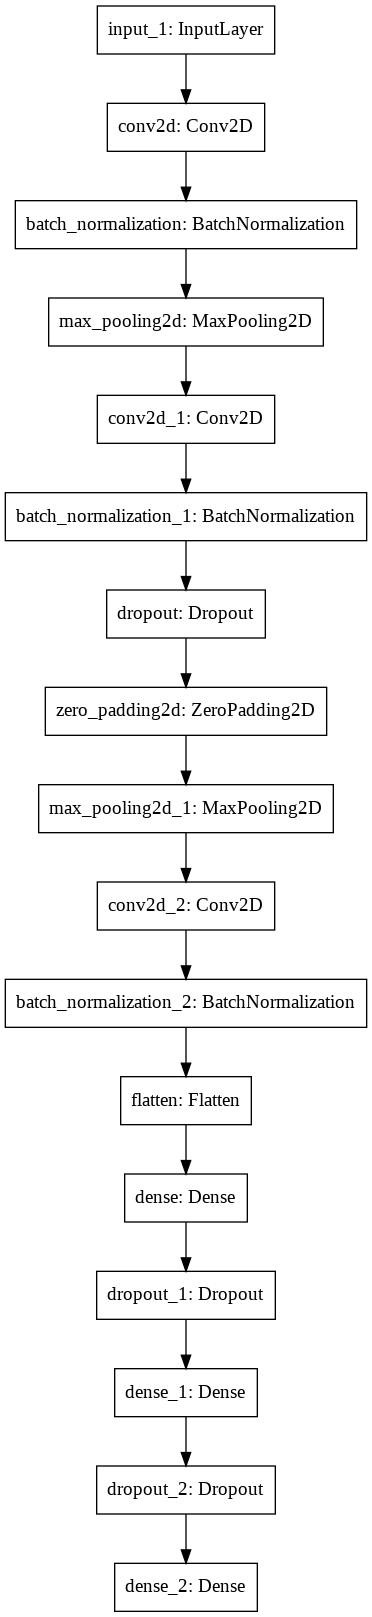

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

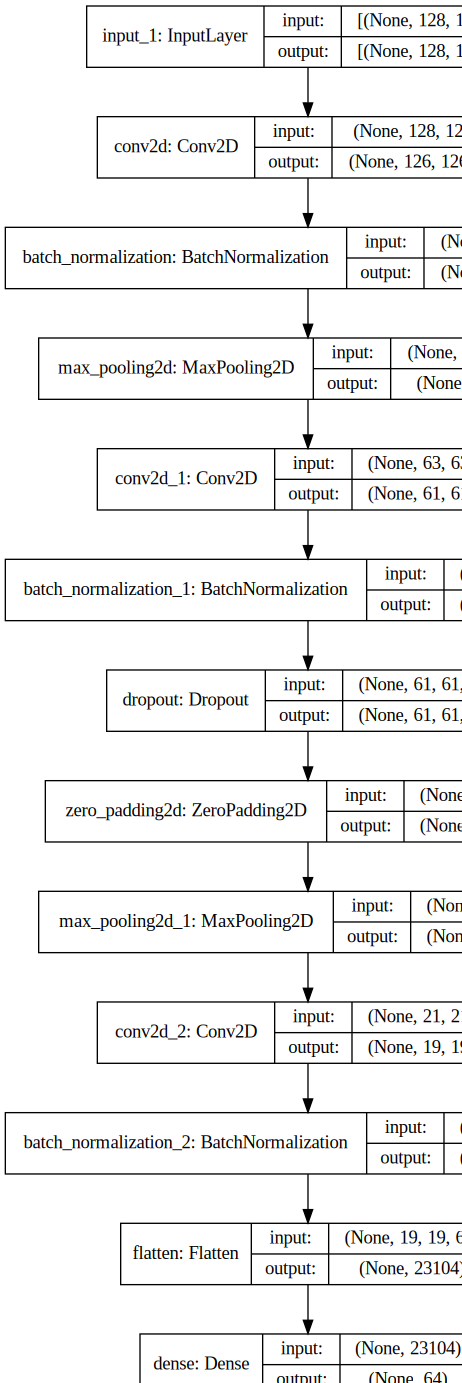

In [ ]:
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model,show_shapes=True).create(prog='dot',format='svg'))

In [ ]:
mfcc_dir = '/content/drive/MyDrive/colab/COVID19_Cough_Classifier/real_data_set.pkl'

real_mfcc = []

with open(mfcc_dir, 'rb') as fp:
    real_mfcc = pickle.load(fp)

print(len(real_mfcc))

3


In [ ]:
pad2d = lambda a, i: a[0:i, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))
real_padded_mfcc = []
    
for i in range(0, len(real_mfcc)):
    real_padded_mfcc.append(pad2d(real_mfcc[i], 128))

real_mfcc_np = np.array(real_padded_mfcc, dtype='float32')

real_status_dims = [0, 0, 0]

real_status_dims = np.array(real_status_dims, dtype='int16')

print(real_mfcc_np.shape, real_status_dims.shape)

(3, 128, 128) (3,)


In [ ]:
real_mfcc_np = np.expand_dims(real_mfcc_np, -1)

real_status_dims = to_categorical(real_status_dims)

print(real_mfcc_np.shape)
print(real_status_dims.shape)

(3, 128, 128, 1)
(3, 1)


In [ ]:
data_x = real_mfcc_np
data_y = model.predict(data_x)

#print('Data : ' + str(test_y[test_idx]))
print(str(data_y))

[[0.88447523 0.11552477]
 [0.79060555 0.20939444]
 [0.79060555 0.20939441]]


In [ ]:
loss_acc = model.evaluate(real_mfcc_np, real_status_dims, batch_size=32)

print('loss : ',str(loss_acc[0]))
print('accuracy : ',str(loss_acc[1]))

In [ ]:
def plot_history(history_dict):
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    
    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(14, 15))
    
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b--', label='train_loss')
    ax1.plot(epochs, val_loss, 'r:', label='val_loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()
    
    acc = history_dict['acc']
    val_acc = history_dict['val_acc']
    
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, acc, 'b--', label='train_accuracy')
    ax2.plot(epochs, val_acc, 'r:', label='val_accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()
    
    plt.show()

In [ ]:
plot_history(history.history)

In [ ]:
data_x = test_x
data_y = model.predict(data_x)
sum=0
#print('Data : ' + str(test_y[test_idx]))
for i in range(0, len(data_y)):
  if(data_y[i][1] < 0.4 and data_y[i][1] > 0.15):
    sum = sum + 1
    print('Predict : ' + str(data_y[i][0]) + ", " + str(data_y[i][1]))
print(sum)

In [ ]:
print('Predict : ' + str(data_y[1][1]))

Predict : 0.17630304


In [ ]:
loss_acc = model.evaluate(test_x, test_y, batch_size=32)

print('loss : ',str(loss_acc[0]))
print('accuracy : ',str(loss_acc[1]))

141/141 [==============================] - 18s 127ms/step - loss: 0.2605 - acc: 0.9288
loss :  0.260526180267334
accuracy :  0.9287774562835693


In [ ]:
print(test_x[0])

In [ ]:
def build_model_dnn():
  model = Sequential()

  input = Input(shape=(900, ), name='input')

  output = Dense(1024, activation='relu', name='hidden1')(input)
  output = Dropout(0.2)(output)
  output = Dense(512, activation='relu', name='hidden2')(output)
  output = BatchNormalization()(output)
  output = Dense(256, activation='relu', name='hidden3')(output)
  output = Dropout(0.2)(output)
  output = Dense(128, activation='relu', name='hidden4')(output)
  output = BatchNormalization()(output)
  output = Dense(64, activation='relu', name='hidden5')(output)
  output = Dropout(0.2)(output)
  output = Dense(32, activation='relu', name='hidden6')(output)
  output = BatchNormalization()(output)
  output = Dense(3, activation='softmax', name='output')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

  return model

In [ ]:
model = build_model_dnn()
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 900)]             0         
_________________________________________________________________
hidden1 (Dense)              (None, 1024)              922624    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
hidden2 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
hidden3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0   

In [ ]:
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Model, load_model

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/colab/COVID19_Cough_Classifier/covid19_cough_classifier_model.h5', compile=True)

export_path='/content/drive/MyDrive/colab/COVID19_Cough_Classifier/model_pb_v2'

model.save(export_path, save_format='tf')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/colab/COVID19_Cough_Classifier/model_pb_v2/assets


In [ ]:
import tensorflow as tf

In [ ]:
saved_model_pb_dir='/content/drive/MyDrive/colab/COVID19_Cough_Classifier/model_pb_v2'

converter=tf.lite.TFLiteConverter.from_saved_model(saved_model_pb_dir)
converter.target_spec.supported_ops=[tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]

tflite_model=converter.convert()

open('/content/drive/MyDrive/colab/COVID19_Cough_Classifier/model_tflite/covid19_cough_classifier_v2.tflite', 'wb').write(tflite_model)

6023232

In [ ]:
import pickle
import os
import librosa

mfcc_result = []

x, fs = librosa.load(os.path.join('/content/drive/MyDrive/colab/COVID19_Cough_Classifier/', 'sample1.wav'), sr=None)
mfcc_result.append(librosa.feature.mfcc(y=x, sr=fs, n_mfcc=128, hop_length=1024))

x, fs = librosa.load(os.path.join('/content/drive/MyDrive/colab/COVID19_Cough_Classifier/', 'sample2.wav'), sr=None)
mfcc_result.append(librosa.feature.mfcc(y=x, sr=fs, n_mfcc=128, hop_length=1024))

x, fs = librosa.load(os.path.join('/content/drive/MyDrive/colab/COVID19_Cough_Classifier/', 'sample2.wav'), sr=None)
mfcc_result.append(librosa.feature.mfcc(y=x, sr=fs, n_mfcc=128, hop_length=1024))
        
print('success')

success


In [ ]:
import numpy as np

pad2d = lambda a, i: a[0:i, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))
real_padded_mfcc = []
    
for i in range(0, len(mfcc_result)):
    real_padded_mfcc.append(pad2d(mfcc_result[i], 128))

real_mfcc_np = np.array(real_padded_mfcc, dtype='float32')

real_status_dims = [0, 0, 0]

real_status_dims = np.array(real_status_dims, dtype='int16')

print(real_mfcc_np.shape, real_status_dims.shape)

(3, 128, 128) (3,)


In [ ]:
from tensorflow.keras.utils import to_categorical

real_mfcc_np = np.expand_dims(real_mfcc_np, -1)

real_status_dims = to_categorical(real_status_dims)

print(real_mfcc_np.shape)
print(real_status_dims.shape)

(3, 128, 128, 1)
(3, 1)


In [ ]:
data_x = real_mfcc_np
data_y = model.predict(data_x)

#print('Data : ' + str(test_y[test_idx]))
print('Predict : ' + str(data_y))

Predict : [[0.88447523 0.11552479]
 [0.7906055  0.2093945 ]
 [0.7906055  0.2093945 ]]


In [ ]:
classifier_load = pickle.load(open('/content/drive/MyDrive/colab/COVID19_Cough_Classifier/cough_classifier', 'rb'))
scaler_load = pickle.load(open('/content/drive/MyDrive/colab/COVID19_Cough_Classifier/cough_classification_scaler', 'rb'))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/colab/COVID19_Cough_Classifier/cough_classifier.h5', compile=True)

export_path='/content/drive/MyDrive/colab/COVID19_Cough_Classifier/cough_classifier_pb'

model.save(export_path, save_format='tf')